"""

@author matheus dias

## Recomendador de Animes

<img src="https://gifs.eco.br/wp-content/uploads/2022/08/gifs-de-joinha-28.gif" width="100%" height="auto">

---**Português**---

Script com um sistema de recomendação simples baseado nos gêneros do anime e nas avaliações dos usuários

Os sistemas de recomendação estão nas mais avançadas empresas de e-commerce, tanto em produtos como em mercadorias. Entender o comportamento dos consumidores é essencial para que possamos modelar um sistema que acompanhe esse comportamento com a finalidade de satisfazer o consumidor e gerar lucros para a empresa.

---**English**---

Script with a simple recommendation system based on anime genres and user ratings

Recommender systems are in the most advanced e-commerce companies, both in products and merchandise. Understanding consumer behavior is essential so that we can model a system that monitors this behavior in order to satisfy the consumer and generate profits for the company.

"""


## Manipulação dos dados
----

In [105]:
# importações necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [106]:
# leitura dos CSV
dataframe_anime = pd.read_csv('anime.csv')
dataframe_notas = pd.read_csv('rating.csv')

In [107]:
# visualizando dataframe
display(dataframe_anime.head())
dataframe_notas.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [108]:
# informações dos dados do dataframe
display(dataframe_anime.info())
print('=='*40)
display(dataframe_notas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


None

In [109]:
# juntando os dataframes
dataframe = pd.merge(dataframe_notas, dataframe_anime.drop('rating', axis=1),on='anime_id' )
print(dataframe.shape)
dataframe.head()

(7813727, 8)


,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297


In [110]:
# testando a junção
dataframe.groupby('name')['rating'].count().sort_values(ascending=False).head(600)

name
Death Note                         39340
Sword Art Online                   30583
Shingeki no Kyojin                 29584
Code Geass: Hangyaku no Lelouch    27718
Elfen Lied                         27506
                                   ...  
Kore wa Zombie Desu ka? OVA         3517
Tokyo Godfathers                    3511
Mai-HiME                            3506
Devil Survivor 2 The Animation      3504
High School DxD Specials            3501
Name: rating, Length: 600, dtype: int64

In [111]:
# dataframe de animes e suas avaliações
notas = pd.DataFrame(dataframe.groupby('name')['rating'].mean())
notas['Número de Avaliações'] = pd.DataFrame(dataframe.groupby('name')['rating'].count())
notas['Média de Avaliação'] = pd.DataFrame(dataframe.groupby('name')['rating'].mean().round(2))
notas

,rating,Número de Avaliações,Média de Avaliação
name,,,
&quot;0&quot;,2.769231,26,2.77
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.000000,2,0.00
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.774936,782,5.77
&quot;Bungaku Shoujo&quot; Memoire,6.155748,809,6.16
&quot;Bungaku Shoujo&quot; Movie,6.457980,1535,6.46
...,...,...,...
xxxHOLiC Kei,6.720774,3413,6.72
xxxHOLiC Movie: Manatsu no Yoru no Yume,6.313742,2365,6.31
xxxHOLiC Rou,6.403173,1513,6.40


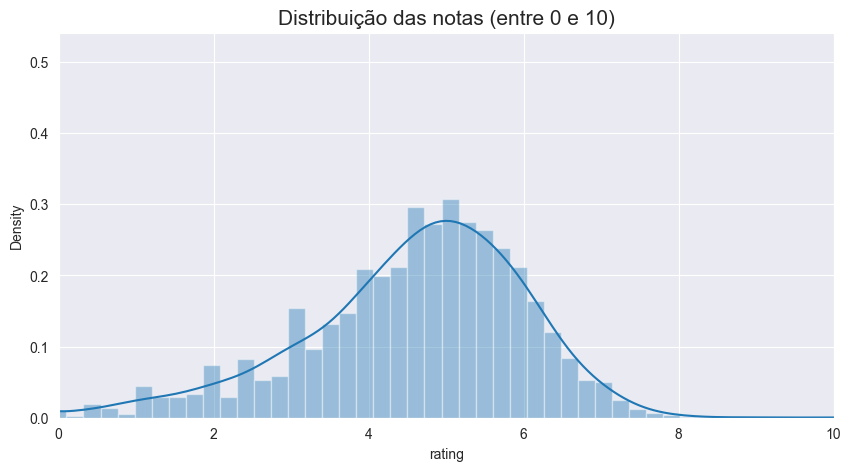

In [112]:
# plotar dados de notas
fig = plt.figure(figsize=(10,5))
sns.distplot(notas['rating'])
plt.xlim(0,10)
plt.title('Distribuição das notas (entre 0 e 10)', fontsize=15);

In [113]:
# dataframe de animes e seus gêneros
genero = pd.DataFrame(data=dataframe_anime[['name','genre']])
genero.set_index('name', inplace=True)
genero

,genre
name,
Kimi no Na wa.,"Drama, Romance, School, Supernatural"
Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
Steins;Gate,"Sci-Fi, Thriller"
Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...
Toushindai My Lover: Minami tai Mecha-Minami,Hentai
Under World,Hentai
Violence Gekiga David no Hoshi,Hentai


-----------------------------------------------------------------------
## Sistema de recomendação
-----------------------------------------------------------------------

In [114]:
def verificar_genero(lista_genero, string):
    """
    Verifica se algum dos gêneros da lista está contido na string.

    Args:
        lista_genero (list): Uma lista de gêneros a serem verificados na string.
        string (str): A string na qual deseja-se verificar a presença dos gêneros.

    Returns:
        bool: True se pelo menos um dos gêneros da lista estiver contido na string, False caso contrário.

    Note:
        Esta função retorna True se pelo menos um dos gêneros da lista_genero estiver contido na string. Caso contrário,
        ela retorna False.
    """
    if any(x in string for x in lista_genero): 
        return True 
    else: 
        return False 

In [115]:

def recomendar_anime(nome_do_anime, n):
    """
    Recomenda animes com base na correlação de avaliações dos usuários.

    Args:
        nome_do_anime (str): O nome do anime para o qual deseja receber recomendações.
        n (int): O número de animes recomendados desejados.

    Returns:
        pandas.DataFrame: Um DataFrame contendo os animes recomendados com suas informações de correlação,
        número de avaliações e média de avaliação. Os resultados são classificados por correlação em ordem decrescente.
        A primeira linha do DataFrame corresponde ao próprio anime consultado.

    Raises:
        KeyError: Se o nome_do_anime não existir no conjunto de dados ou se não houver informações suficientes para
        recomendações (menos de 3000 avaliações).

    Note:
        Esta função assume a existência de variáveis globais, como 'genero', 'dataframe_anime', 'dataframe' e 'notas',
        que devem ser definidas previamente.

    """
    genero_anime = genero.loc[nome_do_anime].values[0].split(', ')
    cols = dataframe_anime[dataframe_anime['genre'].apply(lambda x: verificar_genero(genero_anime, str(x)))]['name'].tolist()
    matriz_de_animes = dataframe[dataframe['name'].isin(cols)].pivot_table(index='user_id', columns='name', values='rating')
    anime_nota = matriz_de_animes[nome_do_anime]
    anime_parecido = matriz_de_animes.corrwith(anime_nota)
    anime_correlacionado = pd.DataFrame(anime_parecido, columns=['correlação'])
    anime_correlacionado = anime_correlacionado.join(notas[['Número de Avaliações', 'Média de Avaliação']])
    anime_correlacionado.dropna(inplace=True)
    animes_recomendados = anime_correlacionado[anime_correlacionado['Número de Avaliações'] > 3000].sort_values('correlação', ascending=False)
    animes_recomendados= animes_recomendados.rename_axis('Animes recomendados')
    print(f'Anime escolhido: {nome_do_anime}')
    return animes_recomendados.head(n+1)

-----------------------------------------------------------------------
## Testes
-----------------------------------------------------------------------

In [116]:
# teste do código
dataframe.groupby('name')['rating'].count().sort_values(ascending=False).head()

name
Death Note                         39340
Sword Art Online                   30583
Shingeki no Kyojin                 29584
Code Geass: Hangyaku no Lelouch    27718
Elfen Lied                         27506
Name: rating, dtype: int64

In [117]:
# teste do código
recomendar_anime('Steins;Gate', 5)

Anime escolhido: Steins;Gate


,correlação,Número de Avaliações,Média de Avaliação
Animes recomendados,,,
Steins;Gate,1.000000,19283,8.13
Steins;Gate Movie: Fuka Ryouiki no Déjà vu,0.725618,6509,7.28
Sora no Otoshimono: Tokeijikake no Angeloid,0.723141,3161,6.36
Gyakkyou Burai Kaiji: Ultimate Survivor,0.720756,3036,7.21
Psycho-Pass,0.719581,14008,7.24
Redline,0.712431,4203,7.20


In [118]:
# teste do código
recomendar_anime('Fullmetal Alchemist: Brotherhood', 3)

Anime escolhido: Fullmetal Alchemist: Brotherhood


,correlação,Número de Avaliações,Média de Avaliação
Animes recomendados,,,
Fullmetal Alchemist: Brotherhood,1.000000,24574,8.03
Fullmetal Alchemist,0.752974,25032,7.06
Hayate no Gotoku!!,0.752110,3019,6.29
Hajime no Ippo,0.729265,4935,7.62
